#Desarrollo de Trabajo Practico Grupal ⚛

In [ ]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
DatosExel = pd.read_csv('Datos-Grupo-4.csv')
tabla = pd.DataFrame(DatosExel)
datos = pd.DataFrame()

#Resolucion del Ejercicio 1
---

In [ ]:
conteo = tabla['Deporte'].value_counts().sort_index()
datos['Datos'] = ['Básquetbol', 'Natación', 'Netball', 'Remo', 'Tenis', 'Waterpolo']
datos['Frecuencia Absoluta'] = conteo.values
datos['Frecuencia Absoluta Acumulada'] = datos['Frecuencia Absoluta'].cumsum()
datos['Frecuencia Relativa'] = round(datos['Frecuencia Absoluta'] / datos['Frecuencia Absoluta'].sum(), 2)
datos['Frecuencia Relativa Acumulada'] = round(datos['Frecuencia Relativa'].cumsum(), 2)
datos['Porcentaje'] = ((datos['Frecuencia Relativa'] * 100).round().astype(int)).apply(lambda x: str(x) + '%')
datos

,Datos,Frecuencia Absoluta,Frecuencia Absoluta Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada,Porcentaje
0,Básquetbol,25,25,0.19,0.19,19%
1,Natación,22,47,0.16,0.35,16%
2,Netball,23,70,0.17,0.52,17%
3,Remo,37,107,0.27,0.79,27%
4,Tenis,11,118,0.08,0.87,8%
5,Waterpolo,17,135,0.13,1.00,13%


#Resolucion del Ejercicio 2

---



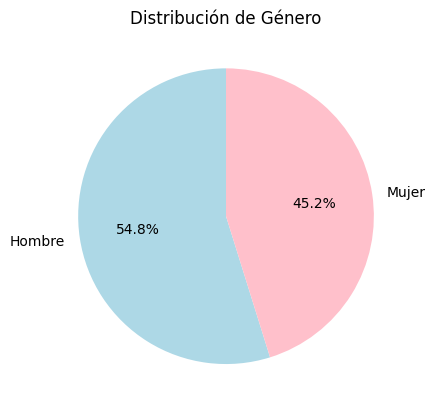

In [ ]:
cantidad = tabla['Sexo'].value_counts()
etiquetas = ['Hombre', 'Mujer']
colores = ['#ADD8E6', '#FFC0CB']
plt.pie(cantidad, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores)
plt.title('Distribución de Género')
plt.show()

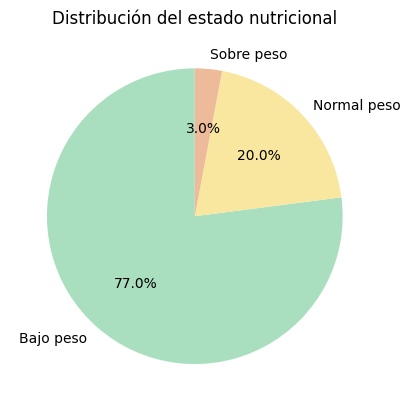

In [ ]:
conteo = tabla['Estado nutricional'].value_counts()
etiquetas = ['Bajo peso', 'Normal peso', 'Sobre peso']
colores = ['#A9DFBF', '#F9E79F', '#EDBB99']
plt.pie(conteo.values, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores)
plt.title('Distribución del estado nutricional')
plt.show()


#Resolucion del Ejercicio 3
---



El HISTOGRAMA es la representación gráfica de una distribución de frecuencias. Es un gráfico formado por un conjunto de rectángulos colocados uno al lado del otro, donde el área de cada rectángulo es proporcional a la frecuencia de la clase que representa.

In [ ]:
intervalos = round(math.log2(len(DatosExel.N)))

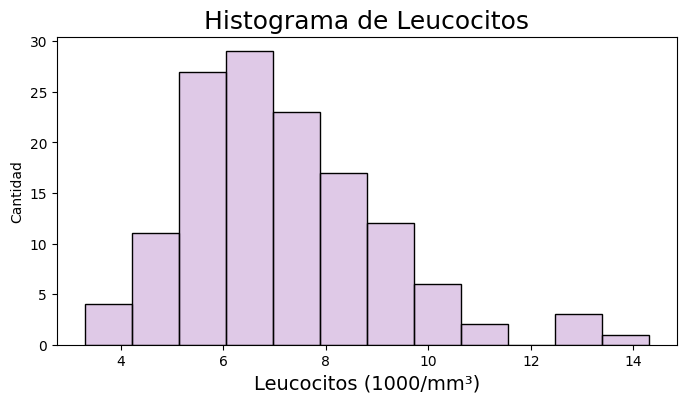

In [105]:
ax = sns.histplot(DatosExel.Leucocitos, kde=False, color='#AF7AC5', alpha=.4) #, bins=intervalos)
ax.figure.set_size_inches(8, 4)
ax.set_title('Histograma de Leucocitos', fontsize=18)
ax.set_xlabel('Leucocitos (1000/mm³)', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=10)
plt.show()

In [ ]:
#@title

tabla_intervalos = pd.cut(DatosExel.Leucocitos, bins=intervalos_redondeados)
tabla_frecuencias = pd.value_counts(tabla_intervalos).reset_index()
tabla_frecuencias.columns = ['Intervalo', 'Frecuencia']
tabla_frecuencias = tabla_frecuencias.sort_values('Intervalo').reset_index(drop=True)
tabla_frecuencias['Absolutas acumuladas'] = tabla_frecuencias['Frecuencia'].cumsum()
tabla_frecuencias['Relativas'] = (tabla_frecuencias['Frecuencia'] / tabla_frecuencias['Frecuencia'].sum()).round(2)
tabla_frecuencias['Relativas acumuladas'] = tabla_frecuencias['Relativas'].cumsum().round(2)
tabla_frecuencias

,Intervalo,Frecuencia,Absolutas acumuladas,Relativas,Relativas acumuladas
0,"(3.289, 4.871]",9,9,0.07,0.07
1,"(4.871, 6.443]",47,56,0.35,0.42
2,"(6.443, 8.014]",41,97,0.30,0.72
3,"(8.014, 9.586]",24,121,0.18,0.90
4,"(9.586, 11.157]",10,131,0.07,0.97
5,"(11.157, 12.729]",1,132,0.01,0.98
6,"(12.729, 14.3]",3,135,0.02,1.00


#Resolucion del Ejercicio 4
---


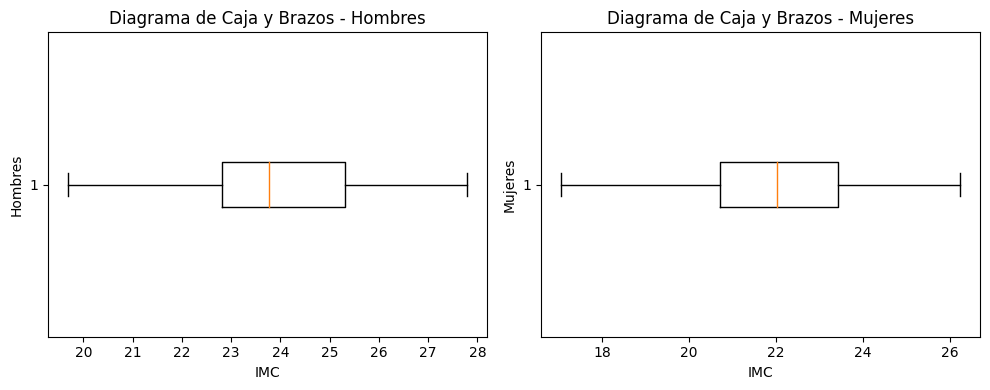

In [ ]:
imc_hombres = tabla.loc[tabla['Sexo'] == 1, 'IMC']
imc_mujeres = tabla.loc[tabla['Sexo'] == 2, 'IMC']

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.boxplot(imc_hombres, vert=False)
plt.title('Diagrama de Caja y Brazos - Hombres')
plt.xlabel('IMC')
plt.ylabel('Hombres')

plt.subplot(1, 2, 2)
plt.boxplot(imc_mujeres, vert=False)
plt.title('Diagrama de Caja y Brazos - Mujeres')
plt.xlabel('IMC')
plt.ylabel('Mujeres')

plt.tight_layout()
plt.show()

#Resolucion del Ejercicio 5
---


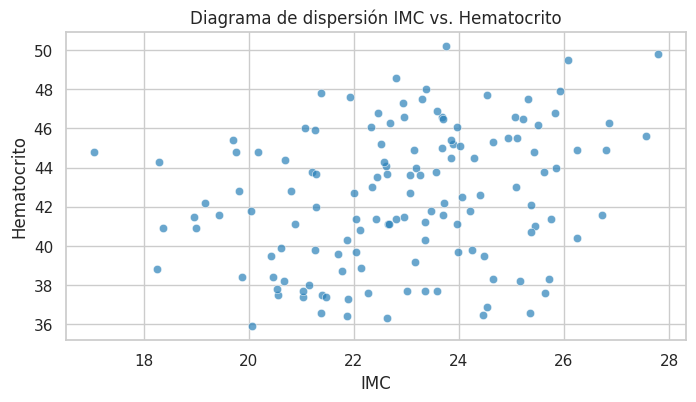

In [139]:
disper = sns.scatterplot(data=DatosExel, x="IMC", y="Hematocrito", color='#2980B9', alpha=0.7)
disper.figure.set_size_inches(8,4)
plt.title('Diagrama de dispersión IMC vs. Hematocrito')
plt.xlabel('IMC')
plt.ylabel('Hematocrito')
plt.grid(True)
plt.show()

#Resolucion del Ejercicio 6
---

In [ ]:
leucocitos_stats = tabla['Leucocitos'].describe()
mediana_leucocitos = leucocitos_stats['50%']
primer_cuartil_leucocitos = leucocitos_stats['25%']
tercer_cuartil_leucocitos = leucocitos_stats['75%']

hematocrito_stats = tabla['Hematocrito'].describe()
desvio_estandar_hematocrito = hematocrito_stats['std']

eritrocitos_stats = tabla['Eritrocitos'].describe()

In [ ]:
print("Estadísticas de Leucocitos:")
print("Mediana:", mediana_leucocitos)
print("1er Cuartil:", primer_cuartil_leucocitos)
print("3er Cuartil:", tercer_cuartil_leucocitos)

print("\nEstadísticas de Hematocrito:")
print("Desvío Estándar:", desvio_estandar_hematocrito)

print("\nEstadísticas de Eritrocitos:")
print(eritrocitos_stats)

Estadísticas de Leucocitos:
Mediana: 6.8
1er Cuartil: 5.9
3er Cuartil: 8.3

Estadísticas de Hematocrito:
Desvío Estándar: 3.4945985328035376

Estadísticas de Eritrocitos:
count    135.000000
mean       4.640963
std        0.425930
min        3.800000
25%        4.310000
50%        4.570000
75%        5.015000
max        5.660000
Name: Eritrocitos, dtype: float64
